In [117]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import datetime
from datetime import date


In [118]:
natgas = pd.read_csv("Nat_Gas.csv")
natgas


,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [119]:
dates = []
prices = []


for n in range(natgas["Dates"].size):
    date_str = natgas["Dates"].iloc[n]
    date_format = '%m/%d/%y'
    date_obj = datetime.strptime(date_str, date_format).date()
    dates.append(date_obj)
    prices.append(natgas["Prices"].iloc[n])

dates

[datetime.date(2020, 10, 31),
 datetime.date(2020, 11, 30),
 datetime.date(2020, 12, 31),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 28),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 5, 31),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 31),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 30),
 datetime.date(2021, 10, 31),
 datetime.date(2021, 11, 30),
 datetime.date(2021, 12, 31),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 28),
 datetime.date(2022, 3, 31),
 datetime.date(2022, 4, 30),
 datetime.date(2022, 5, 31),
 datetime.date(2022, 6, 30),
 datetime.date(2022, 7, 31),
 datetime.date(2022, 8, 31),
 datetime.date(2022, 9, 30),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 30),
 datetime.date(2022, 12, 31),
 datetime.date(2023, 1, 31),
 datetime.date(2023, 2, 28),
 datetime.date(2023, 3, 31),
 datetime.date(2023, 4, 30),
 datetime.date(2023, 5, 31),
 datetime.date(2023, 6, 30),
 datetime.date(2023, 7, 31),
 date

C:\Users\UKLDC004\AppData\Local\Temp\ipykernel_15036\2546021343.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


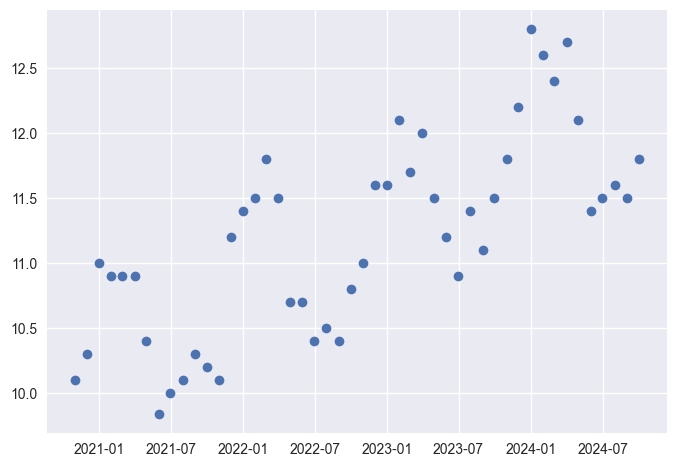

In [120]:
plt.style.use("seaborn")
plt.plot_date(dates, prices)
plt.tight_layout
plt.show()

Dates are listed from October 31st 2020 to September 30th 2024. For the purpose of the model fitting, I will assign indices
to the dates as they occur at monthly intervals. 0 - 47 where 0 == 10/2020 and 47 == 9/2024

First test if a linear or quadratic model fits the data better

In [121]:
#Linear:
date_num = np.arange(48)

all_ones = np.ones(np.shape(date_num))
X  = np.column_stack((all_ones, date_num))

# Defining the y vector
yvalues = prices 

# Computing the optimum coefficient vector beta* using the formula
XT = X.T  # transpose
beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues))

# Computing the fit of the model
fit_lin = X.dot(beta_lin)   

# Fit of zeroth-order model (mean of y)
fit_0 = np.mean(yvalues)*all_ones 

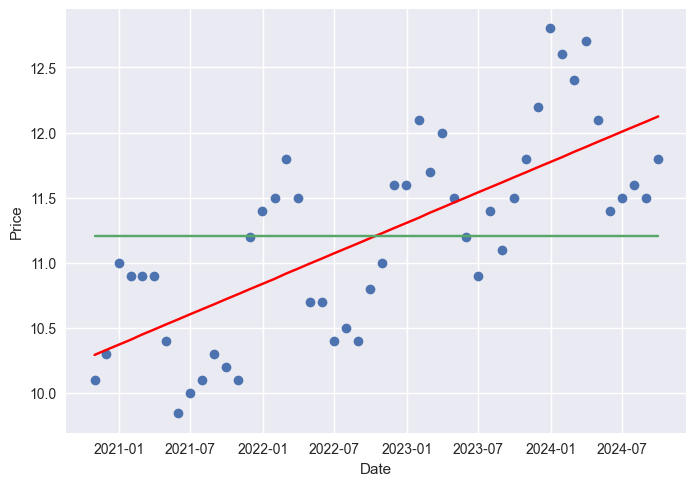

In [122]:

plt.plot_date(dates, prices)
plt.plot(dates, fit_lin, color = 'red')
plt.plot(dates, fit_0)  
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout
plt.show()

In [123]:
#Calculate sum of squared error and mean squared error
SSE_0 = np.linalg.norm(yvalues - fit_0)**2
MSE_0 = SSE_0/(np.size(yvalues))

SSE_1 = np.linalg.norm(yvalues - fit_lin)**2
MSE_1 = SSE_1/(np.size(yvalues))

print('SSE_0 = ', np.round_(SSE_0, 2), ' \t MSE_0 = ', np.round_(MSE_0, 2))  
print('SSE_1 = ', np.round_(SSE_1, 2), ' \t MSE_1 = ', np.round_(MSE_1, 2) )

SSE_0 =  27.0  	 MSE_0 =  0.56
SSE_1 =  12.98  	 MSE_1 =  0.27


In [124]:
#Quadratic

all_ones = np.ones(np.shape(date_num))
X  = np.column_stack((all_ones, date_num, date_num**2))

# Defining the y vector
yvalues = prices 

# Computing the optimum coefficient vector beta* using the formula
XT = X.T  # transpose
beta_quad = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues))

# Computing the fit of the model
fit_quad = X.dot(beta_quad)   

# Fit of zeroth-order model (mean of y)
fit_0 = np.mean(yvalues)*all_ones 
beta_quad

array([ 1.02596888e+01,  4.30023740e-02, -8.48751156e-05])

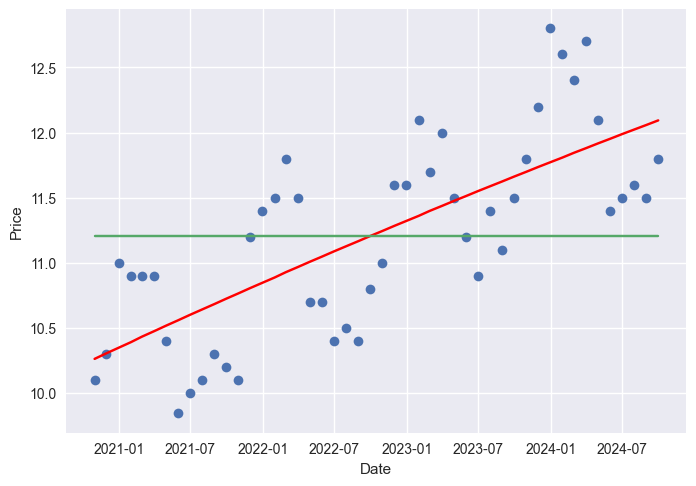

In [125]:

plt.plot_date(dates, prices)
plt.plot(dates, fit_quad, color = 'red')
plt.plot(dates, fit_0)  
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout
plt.show()

In [126]:
#Calculate SSE and MSE
SSE_1 = np.linalg.norm(yvalues - fit_quad)**2
MSE_1 = SSE_1/(np.size(yvalues))

print('SSE_1 = ', np.round_(SSE_1, 2), ' \t MSE_1 = ', np.round_(MSE_1, 2) )

SSE_1 =  12.97  	 MSE_1 =  0.27


The quadratic model shows to have an ever-so-slighly smaller SSE, therefore we will proceed with the qudratic model.

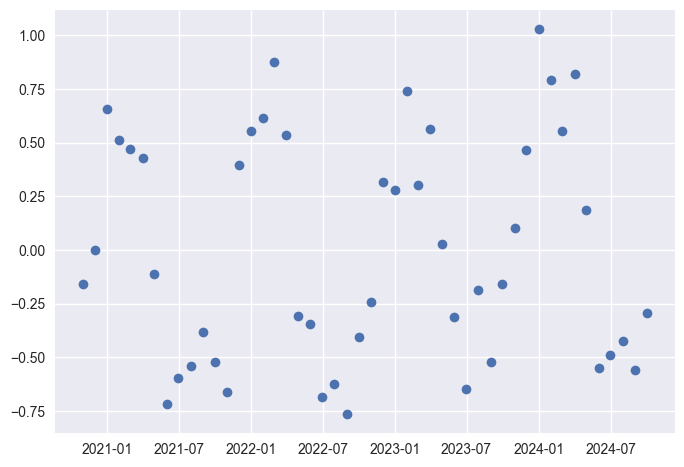

Mean of residuals =  -0.0 Variance of residuals =  0.27


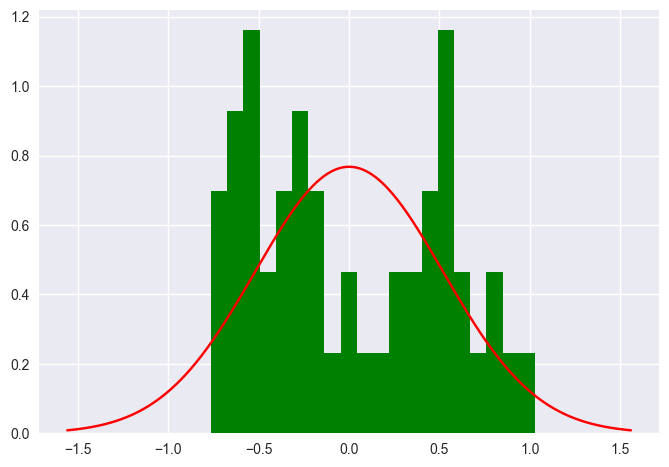

In [127]:
#Analysis of residuals
#Compute the residuals
resid_quad = yvalues - fit_quad
plt.plot_date(dates, resid_quad)
plt.show()

print('Mean of residuals = ', np.round(np.mean(resid_quad), 5), 'Variance of residuals = ', 
      np.round(np.var(resid_quad), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_quad, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_quad)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()

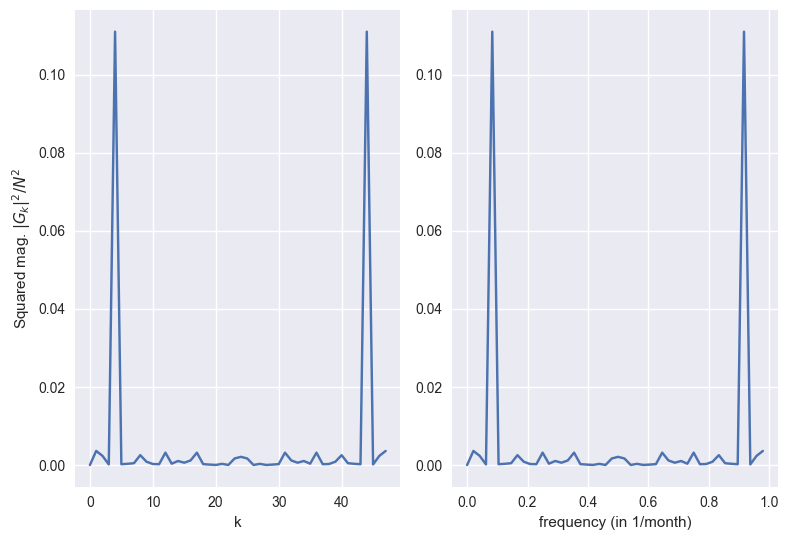

In [128]:
#Fit a sinusoidal component to the model
#Find dominant frequencies

N = np.size(date_num)
T = 1  #time interval between any two successive values in months.

# Compute the squared magnitudes of the DFT coefficients in the form of a periodogram
pgram = np.abs(np.fft.fft(resid_quad, N)/N)**2
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = indices/(N*T)
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency (in 1/month)')  # Since units of T is months
plt.tight_layout()

In [129]:
#Extract dominant frequencies
top_inds = indices[(pgram > 0.2*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.2*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)

Top indices: [ 4. 44.]  Top frequencies in Hz: [0.08333333 0.91666667]


In [130]:
w = 2*math.pi*top_inds[0]/(N*T)  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)
# Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
XT = np.vstack((np.sin(w*date_num), np.cos(w*date_num)))
X = np.transpose(XT)

w


0.5235987755982988

In [131]:
beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(resid_quad) # Calculating the least-squares coefficients
print('The coefficients beta_s, beta_c are:', beta_sc)
fit_sc = X.dot(beta_sc)
beta_sc

The coefficients beta_s, beta_c are: [ 0.66508225 -0.04331528]


array([ 0.66508225, -0.04331528])

Text(0.5, 1.0, 'Scatter plot of de-trended residuals, and fitted sinusoid')

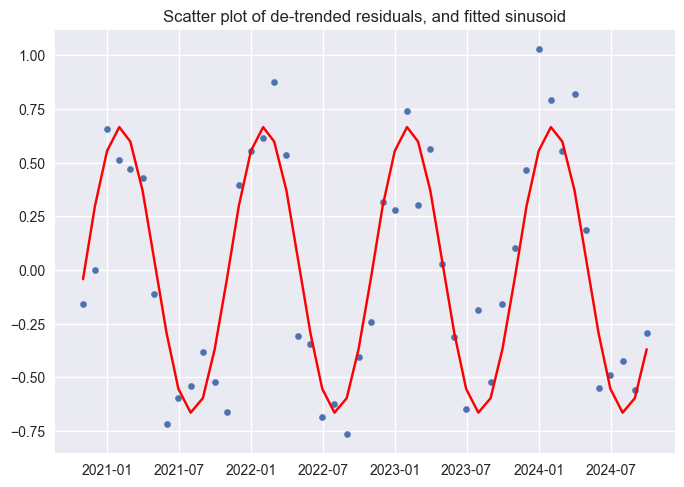

In [132]:
plt.scatter(dates, resid_quad, s=20)
plt.plot(dates, fit_sc, 'r')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoid')

Mean of final residuals: -0.0
Sum of squared errors SSE for quadratic + sinusoid model is: 2.305
Mean squared error MSE for quadratic + sinusoid model is: 0.048


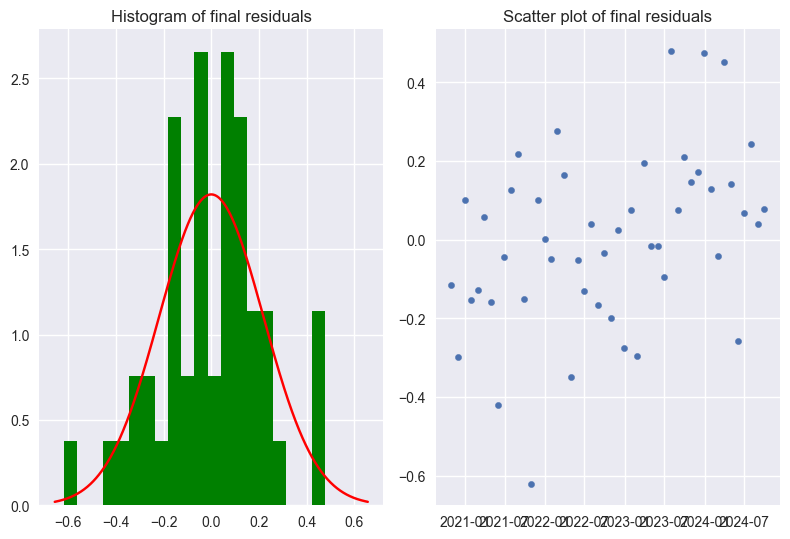

In [133]:
#Residual analysis
resid_final = resid_quad - fit_sc
SSE_final = np.linalg.norm(resid_final)**2
MSE_final = SSE_final/np.size(yvalues)
print('Mean of final residuals:', np.round(np.mean(resid_final), 3))
print('Sum of squared errors SSE for quadratic + sinusoid model is:', np.round(SSE_final, 3)) 
print('Mean squared error MSE for quadratic + sinusoid model is:',  np.round(MSE_final,3))
from scipy.stats import norm

# Plot Gaussian pdf with same mean and variance as the residuals
res_final_stdev = np.std(resid_final)  #standard deviation of residuals
xvals = np.linspace(-3*res_final_stdev,3*res_final_stdev,1000)
plt.subplot(121)
n, bins, patches = plt.hist(resid_final, bins=20, density=True, facecolor='green');
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_final_stdev), 'r')
plt.title('Histogram of final residuals')
plt.subplot(122)
plt.scatter(dates, resid_final, s=20)
plt.title('Scatter plot of final residuals')
plt.tight_layout()

Text(0, 0.5, 'Price')

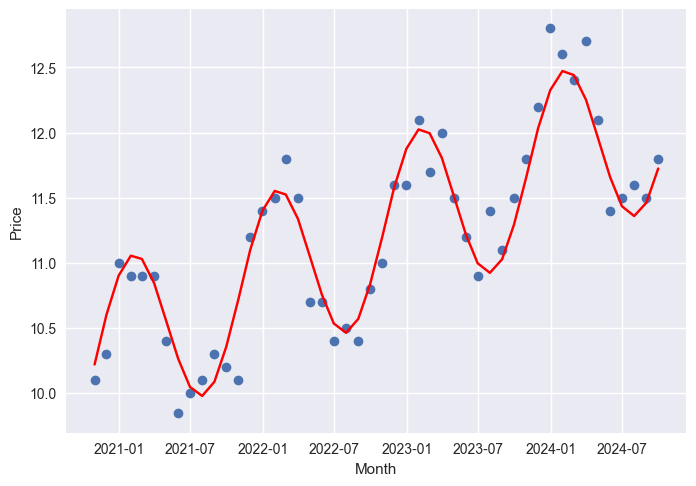

In [134]:
#Combined fit
fit_combined = fit_quad + fit_sc

plt.plot_date(dates, prices)
plt.plot_date(dates, fit_combined, 'r')
plt.xlabel('Month')
plt.ylabel('Price')

Extrapolate one year into the future

In [135]:

dates_future = []
import calendar


start = date(2024,10,31) 
k = 12
 
for month in range(k):
    year = start.year + (start.month + month - 1) // 12
    new_month = (start.month + month - 1) % 12 + 1
    new_day = min(start.day, calendar.monthrange(year, new_month)[1])
    new_date = date(year, new_month, new_day)
    dates_future.append(new_date)

new_dates = dates + dates_future

Text(0, 0.5, 'Price')

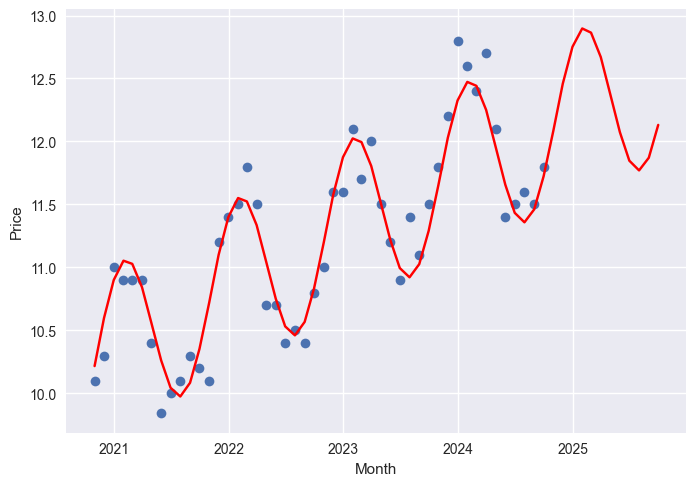

In [136]:
date_num2 = np.arange(60)
all_ones = np.ones(np.shape(date_num2))
X_future  = np.column_stack((all_ones, date_num2, date_num2**2))
fit_quad_future = X_future.dot(beta_quad)
XT_future = np.vstack((np.sin(w*date_num2), np.cos(w*date_num2)))
X_futuresc = np.transpose(XT_future)
fit_sc_future = X_futuresc.dot(beta_sc)
fit_combined_future = fit_quad_future + fit_sc_future


plt.plot_date(dates, prices)
plt.plot_date(new_dates, fit_combined_future, 'r')
plt.xlabel('Month')
plt.ylabel('Price')

In [140]:
#input in the form mm/dd/yy
def pricing_model(date_xxyy, beta_quad = [ 1.02596888e+01,  4.30023740e-02, -8.48751156e-05], beta_sc = [ 0.66508225, -0.04331528], w = 0.5235987755982988):
    #convert datetime object to integer where 0 == 31/10/2020
    date_format = '%m/%d/%y'
    date_obj = datetime.strptime(date_xxyy, date_format).date()
    print(date_obj)
    oct31_2020 = '%m/%d/%y'
    date_zero = datetime.strptime('10/31/20', oct31_2020).date()
    print(date_zero)
    x = (date_obj - date_zero).days/30.5
    print(x)
    quad = np.array([1, x, x**2]).dot(beta_quad)
    sc = np.array([np.sin(w*x), np.cos(w*x)]).dot(beta_sc)
    price = quad + sc
    return price

pricing_model('7/15/25')


2025-07-15
2020-10-31
56.32786885245902


11.803238283117725